In [1]:
# Importing required packages
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data from below URL file
train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/MNC_Salaries.csv')
train.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [5]:
train.corr()

,Number,Age,Weight,Salary
Number,1.000000,0.028724,0.206921,-0.112386
Age,0.028724,1.000000,0.087183,0.213459
Weight,0.206921,0.087183,1.000000,0.138321
Salary,-0.112386,0.213459,0.138321,1.000000


In [8]:
#Looks like height values have corrupted with date values.  Better to remove them as it does not make sense.
train.drop(['Height'], axis=1, inplace=True)

In [9]:
train.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [10]:
train.apply(lambda x: sum(x.isnull()))

Name         0
Team         0
Number       0
Position     0
Age          0
Weight       0
College     84
Salary      11
dtype: int64

In [11]:
# NaN values in Salary feature filling with mean of Salary feature
train['Salary'].fillna(train['Salary'].mean(), inplace=True)

In [12]:
train.apply(lambda x: sum(x.isnull()))

Name         0
Team         0
Number       0
Position     0
Age          0
Weight       0
College     84
Salary       0
dtype: int64

In [13]:
train.shape

(457, 8)

In [14]:
train.apply(lambda x: len(x.unique()))

Name        457
Team         30
Number       53
Position      5
Age          22
Weight       87
College     119
Salary      310
dtype: int64

In [15]:
# Checking percentage of College information missing.
(84/119)*100

70.58823529411765

In [16]:
# 70% of college data is have Null values and better to remove it
# Name feature also does not have any relationship with Salary and dropping it
if('College' in train.columns):
    train.drop(['College'], axis=1, inplace=True)
if('Name' in train.columns):
    train.drop(['Name'], axis=1, inplace=True)
if('Team' in train.columns):
    train.drop(['Team'], axis=1, inplace=True)

In [17]:
train.head()

,Number,Position,Age,Weight,Salary
0,0,PG,25,180,7.730337e+06
1,99,SF,25,235,6.796117e+06
2,30,SG,27,205,4.842684e+06
3,28,SG,22,185,1.148640e+06
4,8,PF,29,231,5.000000e+06


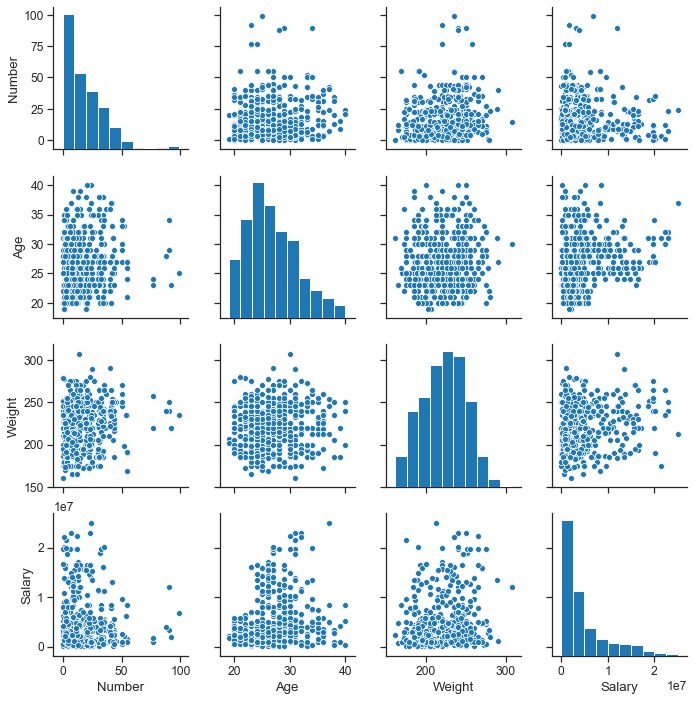

In [20]:
sns.pairplot(train)

In [21]:
train.corr()

,Number,Age,Weight,Salary
Number,1.000000,0.028724,0.206921,-0.111436
Age,0.028724,1.000000,0.087183,0.210627
Weight,0.206921,0.087183,1.000000,0.135552
Salary,-0.111436,0.210627,0.135552,1.000000


In [22]:
#train["Number"].hist().apply(np.log)
train['Number'] = np.log2(train['Number'])

In [23]:
train['Number'].unique

<bound method Series.unique of 0          -inf
1      6.629357
2      4.906891
3      4.807355
4      3.000000
5      6.491853
6      5.781360
7      5.357552
8      3.584963
9      5.169925
10     2.807355
11     2.000000
12     3.459432
13     3.700440
14     5.459432
15     5.459432
16     4.459432
17     4.392317
18     4.584963
19     1.000000
20     3.321928
21     2.584963
22         -inf
23     3.459432
24     0.000000
25     5.044394
26     5.357552
27     3.807355
28     3.906891
29     4.906891
         ...   
427    5.087463
428    3.000000
429    2.321928
430    4.523562
431    4.087463
432    2.000000
433    3.169925
434    5.129283
435    3.459432
436        -inf
437    1.584963
438    5.459432
439    4.584963
440    1.000000
441    4.392317
442    5.044394
443    1.584963
444    3.321928
445    3.459432
446    3.906891
447    4.754888
448    4.321928
449    2.321928
450    1.000000
451    4.523562
452    5.357552
453    3.000000
454    4.643856
455    4.392317
456    4.

In [26]:
#One Hot Coding:
data = pd.get_dummies(train, columns=['Position'])

In [27]:
data.corr()

,Number,Age,Weight,Salary,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
Number,1.000000,0.010699,0.207911,-0.125798,0.151984,0.148825,-0.226905,0.007682,-0.078565
Age,0.010699,1.000000,0.087183,0.210627,0.044659,0.026620,-0.010374,-0.008683,-0.048679
Weight,0.207911,0.087183,1.000000,0.135552,0.562900,0.379911,-0.610797,0.004600,-0.301937
Salary,-0.125798,0.210627,0.135552,1.000000,0.098850,-0.027877,0.021884,0.001346,-0.083968
Position_C,0.151984,0.044659,0.562900,0.098850,1.000000,-0.240101,-0.227759,-0.216853,-0.243172
Position_PF,0.148825,0.026620,0.379911,-0.027877,-0.240101,1.000000,-0.265713,-0.252990,-0.283695
Position_PG,-0.226905,-0.010374,-0.610797,0.021884,-0.227759,-0.265713,1.000000,-0.239986,-0.269112
Position_SF,0.007682,-0.008683,0.004600,0.001346,-0.216853,-0.252990,-0.239986,1.000000,-0.256226
Position_SG,-0.078565,-0.048679,-0.301937,-0.083968,-0.243172,-0.283695,-0.269112,-0.256226,1.000000


In [15]:
data.head()

,Number,Age,Weight,Salary,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
0,0,25,180,7.730337e+06,0,0,1,0,0
1,99,25,235,6.796117e+06,0,0,0,1,0
2,30,27,205,4.842684e+06,0,0,0,0,1
3,28,22,185,1.148640e+06,0,0,0,0,1
4,8,29,231,5.000000e+06,0,1,0,0,0


In [28]:
#After looking at data.corr(), Age and Weight only adding significant positive correlation values.  Hence removed other attributes also
X = data.drop(['Salary','Number','Position_C', 'Position_PF', 'Position_PG', 'Position_SF', 'Position_SG'], axis=1)
y = data['Salary']

#Scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X)
train_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns)
train_scaled.head()

In [36]:
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()
X = MMscaler.fit_transform(X)

# Modeling

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [39]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1)

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, x, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, x, y, cv=cv, 
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, x, y, cv=cv, scoring='r2').mean())

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)

names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, x_train, y_train)

In [41]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,4.983385e+06,0.039937
1,Ridge Regression,4.982898e+06,0.040401
2,Lasso Regression,4.983385e+06,0.039937
3,K Neighbors Regressor,5.207117e+06,-0.040147
4,Decision Tree Regressor,7.036617e+06,-0.901870
5,Random Forest Regressor,5.848927e+06,-0.276437
6,Gradient Boosting Regressor,5.336075e+06,-0.092347
7,Adaboost Regressor,5.302592e+06,-0.066754


In [33]:
X

,Age,Weight
0,25,180
1,25,235
2,27,205
3,22,185
4,29,231
5,29,240
6,21,235
7,25,238
8,22,190
9,22,220
